## Force Spectroscopy Processing

#### Import packages and find all the *.nid files.

In [1]:
from NSFopen.read import read as afmreader

import os
from os import listdir
from os.path import isfile, join

import numpy as np
import math
import pprint
import collections
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

dirpath = os.getcwd()

# list all *.nid files
onlyfiles = [f for f in listdir(dirpath) if isfile(join(dirpath, f)) and f.split(".")[-1] == "nid"]

# list only files where there is "spectroscopy_" in the filename
force_files = [f for f in onlyfiles if "spectroscopy" in f.split("_")]

print(dirpath, "with", len(force_files)," *.nid force files:")
pprint(force_files)

C:\Users\applab\Downloads\Jupyter Notebooks\ForceSpetroscopy with 1  *.nid force files:
['spectroscopy_0001.nid']


#### Read data

In [2]:
filename = 'spectroscopy_0001.nid'
alldata = afmreader(filename, verbose=False).data
params = afmreader(filename, verbose=False).param

#### Study the data

In [3]:
alldata

Image  Forward   Z-Axis           [[-2.0353380013257264e-06, -2.0353067460469904...
                 Amplitude        [[0.19510995596647263, 0.19624395295977592, 0....
                 Phase            [[-0.3227592632174492, -0.570032112300396, 1.4...
                 Z-Axis Sensor    [[1.3012584000825895e-06, 1.3011265546083438e-...
                 Deflection                                                     NaN
       Backward  Z-Axis           [[-2.0308267816901207e-06, -2.0314367319457234...
                 Amplitude        [[0.19098110496997833, 0.19194109365344048, 0....
                 Phase            [[-0.9834825620055199, -1.571555882692337, 0.6...
                 Z-Axis Sensor    [[1.301939662545919e-06, 1.301317282021045e-06...
                 Deflection                                                     NaN
Spec   Forward   Z-Axis                                                         NaN
                 Amplitude                                                  

In [4]:
params

Tip          Manufacturer                                                                                 BudgetSensors
             Name                                                                                            Tap150Al-G
             Prop0                                                                    {'Value': 2.72436, 'Unit': 'N/m'}
             Prop1                                                                    {'Value': 150000.0, 'Unit': 'Hz'}
             Prop2                                                                     {'Value': 0.000125, 'Unit': 'm'}
                                                                                            ...                        
Header Dump  ProcessorSet-{138707ED-FD93-4E28-B2B0-C5DA628CB815}:0    {'Name': 'Indentation', 'GUID': '{138707ED-FD9...
             ProcessorSet-{AB0B4062-81AF-464B-A7F7-75B11891ACF8}:0    {'Name': 'Slope', 'GUID': '{AB0B4062-81AF-464B...
             ProcessorSet-{AB0B4062-81AF

#### Load the spectroscopy data

In [5]:
adhesion_data = alldata['Spec']['Backward']['Deflection']
zaxis = alldata['Spec']['Backward']['Z-Axis Sensor']

#### Plot spectorscopy data

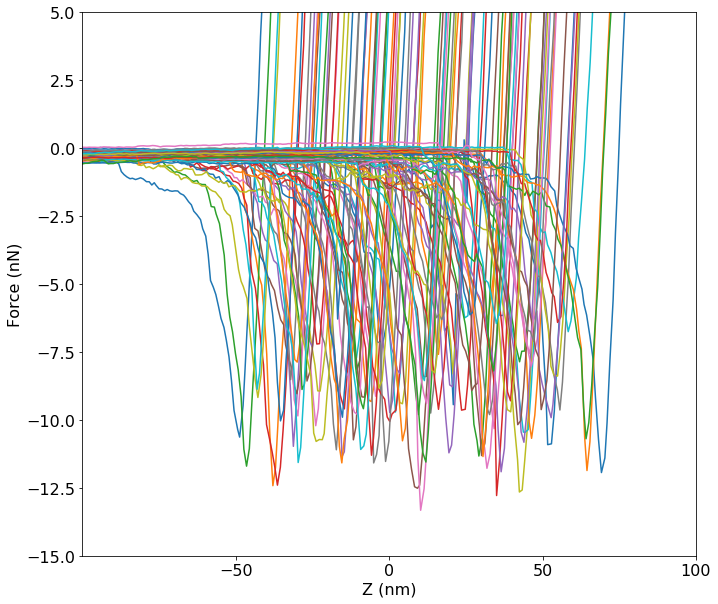

In [7]:
font = {'size': 16}
matplotlib.rc('font', **font)

adhesion_force = []

for i in range(len(adhesion_data)):
    plt.plot(zaxis[i]*1e9+1250, adhesion_data[i]*1e9)
    adhesion_force.append(np.min(adhesion_data[i]*1e9))

plt.xlim([-100, 100])
plt.ylim([-15, 5])
plt.xticks(np.arange(-50, 150, step=50))

plt.xlabel('Z (nm)')
plt.ylabel('Force (nN)')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 10)
fig.savefig('adhesion.png', dpi=300)

plt.show()

#### Plot histogram

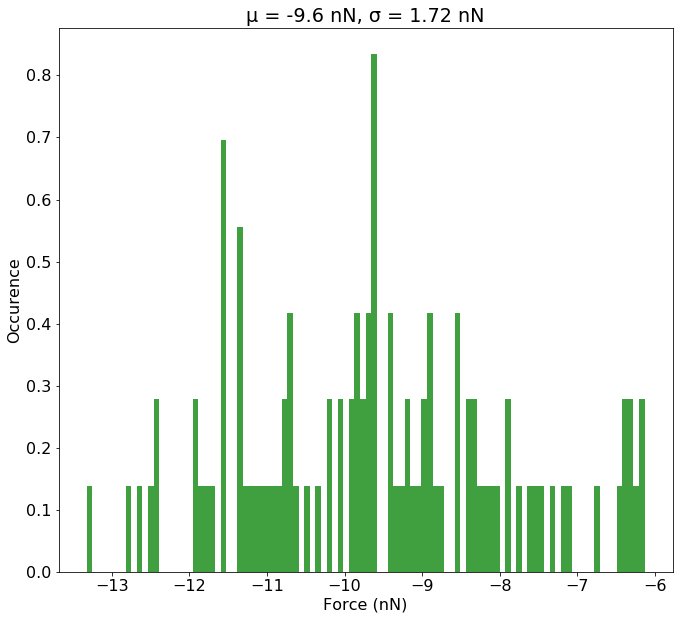

In [8]:
med = np.median(adhesion_force)
stdev = np.std(adhesion_force)
n, bins, patches = plt.hist(adhesion_force, 100, density=True, facecolor='g', alpha=0.75)
plt.title('\u00B5 = {:.1f} nN, \u03C3 = {:.2f} nN'.format(med, stdev))
plt.xlabel('Force (nN)')
plt.ylabel('Occurence')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 10)
fig.savefig('adhesion_dist.png', dpi=300)
